In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [40]:
Loyal=pd.read_csv('lobster_loyal.csv')
Gold=pd.read_csv('new_gold.csv')

In [41]:
Loyal.head()

,guestID,homestate,visits_2021,avg_rides_dry,avg_rides_water,total_merch,total_snack_shack,total_goldzone
0,1,Maine,3,8.7,1.7,287.5,159.0,312.1
1,2,Vermont,10,6.7,5.9,166.4,114.8,209.9
2,3,Massachusetts,9,9.5,3.9,221.3,102.3,98.1
3,4,Maine,7,6.6,7.9,248.1,136.3,128.6
4,5,NaN,13,6.5,3.6,252.4,120.8,420.2


# A.Drop the guestID variable:

In [42]:
Loyal=Loyal.drop(columns=['guestID'])
Loyal.head()

,homestate,visits_2021,avg_rides_dry,avg_rides_water,total_merch,total_snack_shack,total_goldzone
0,Maine,3,8.7,1.7,287.5,159.0,312.1
1,Vermont,10,6.7,5.9,166.4,114.8,209.9
2,Massachusetts,9,9.5,3.9,221.3,102.3,98.1
3,Maine,7,6.6,7.9,248.1,136.3,128.6
4,NaN,13,6.5,3.6,252.4,120.8,420.2


a Guest ID is not relevant to any other variables. GuestID is randomly assigned to each guest. Clustering, in this case, is to group people with similarities together, and since GuestID is randomly assigned, it can not represent any similarities between people.Therefore, we do not want our clustering use it.

# B.Call the describe() function on your datase:

In [43]:
Loyal.describe()

,visits_2021,avg_rides_dry,avg_rides_water,total_merch,total_snack_shack,total_goldzone
count,654.000000,654.000000,649.000000,654.000000,654.000000,654.000000
mean,11.802752,8.138226,4.016025,251.069113,111.592661,265.251988
std,3.433810,2.552393,1.557486,36.164945,29.008124,109.326777
min,3.000000,0.300000,0.100000,129.500000,13.400000,0.500000
25%,9.250000,6.500000,3.000000,224.725000,94.025000,186.200000
50%,12.000000,8.200000,4.000000,252.400000,112.200000,263.100000
75%,14.000000,9.800000,5.100000,276.500000,129.200000,341.650000
max,24.000000,16.900000,8.900000,369.600000,211.900000,652.300000


a  Firstly, through the summarized data, I was acknowledged that each one of our loyal customers visited Lobsterland 11.8 times on average, and most people visited the park 8.4 times to 15.2 times. it also shows our loyal customers usually take 4 water rides on average and take non-water rides 8 times on average. The data can help us understand our loyal customers' preferences, the information can help us decide what ride to build in the future. The summarized data of merch, snack shack, and gold zone can help us to understand our loyal customers' shopping behaviors in general. Secondly, The descriptive data is presented in a meaningful way, and allows for simplified interpretation of the dataset because row data is difficult to analyze. Thirdly, The range statistics are useful for detecting coding errors, and should be found in early analyses.                                                                                                                                                     
The descriptive data helps analysts to understand the data at a glance, helping them manipulate the dataset better. It also helps analysts to minimize the chance they have errors in their work.

# C. Missing values:

In [44]:
Loyal.isnull().sum()

homestate            51
visits_2021           0
avg_rides_dry         0
avg_rides_water       5
total_merch           0
total_snack_shack     0
total_goldzone        0
dtype: int64

a.homestate column contains 51 missing values, and avg_rides_water contains 5 missing values.

b.The idea of k-mean clustering is to find a perfect center and put entities with similar variables together, and make it a cluster. To do so, we need to quantify all the variables. You can not find a relationship between two categorical variables and draw them on a chart, therefor categorical variables do not affect the clustering model, but if we change categorical variables to numerical variables, it is useable for the clustering model. But missing value in numerical varibles can make clustering wrong if the varibles are really important.

c.In an attendance recording system, all the students need to sign in and write down their names when they come to class. The students who do not show up have NaNs on their records. These NaNs mean absence in the class.

In [45]:
Loyal=Loyal.dropna(axis=0, subset=['avg_rides_water'])
#Loyal.head()
Loyal.isnull().sum()

homestate            51
visits_2021           0
avg_rides_dry         0
avg_rides_water       0
total_merch           0
total_snack_shack     0
total_goldzone        0
dtype: int64

d. Because missing value in avg_rides_water only counts a small percentage, I decide to drop the rows.

# D.Data scaling:

In [46]:
Loyal=Loyal.drop(columns=['homestate'])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(Loyal)
data_normalized=scaler.transform(Loyal)
data_normalized=pd.DataFrame(data=data_normalized,index=Loyal.index,columns=Loyal.columns)
print(data_normalized.describe().round(2))
data_normalized.head()

       visits_2021  avg_rides_dry  avg_rides_water  total_merch  \
count       649.00         649.00           649.00       649.00   
mean         -0.00           0.00            -0.00        -0.00   
std           1.00           1.00             1.00         1.00   
min          -2.55          -2.90            -2.52        -3.39   
25%          -0.81          -0.65            -0.65        -0.72   
50%           0.06           0.02            -0.01         0.04   
75%           0.64           0.65             0.70         0.71   
max           3.54           3.45             3.14         3.29   

       total_snack_shack  total_goldzone  
count             649.00          649.00  
mean                0.00            0.00  
std                 1.00            1.00  
min                -3.38           -2.42  
25%                -0.61           -0.73  
50%                 0.02           -0.02  
75%                 0.61            0.70  
max                 3.47            3.54  


,visits_2021,avg_rides_dry,avg_rides_water,total_merch,total_snack_shack,total_goldzone
0,-2.554636,0.215778,-1.488175,1.004666,1.640505,0.425681
1,-0.521756,-0.572070,1.210559,-2.360861,0.115283,-0.508936
2,-0.812168,0.530918,-0.074552,-0.835118,-0.316058,-1.531345
3,-1.392991,-0.611463,2.495671,-0.090311,0.857190,-1.252423
4,0.349478,-0.650855,-0.267319,0.029192,0.322327,1.414254


a.Yes, the data needs to be sdandardized.visits_2021,avg_rides_dry,and avg_rides_water have different units from total_merch,total_snack_shack and total_goldzone.visits_2021,avg_rides_dry,and avg_rides_water are counted as times to visit, total_merch,total_snack_shack and total_goldzone are the money amount. Moreover, total_merch,total_snack_shack and total_goldzone have the number much larger than visits_2021,avg_rides_dry,and avg_rides_water, which can affect clusttering simulation.

In [48]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters = 3,random_state=700)
model.fit(data_normalized)
labels=model.predict(data_normalized)

In [49]:
Loyal2=Loyal.assign(Cluster=labels)
grouped=Loyal2.groupby(['Cluster'])

grouped.agg({
    'visits_2021':'mean',
    'avg_rides_dry':'mean',
    'avg_rides_water':'mean',
    'total_merch':'mean',
    'total_snack_shack':'mean',
    'total_goldzone':'mean',
    
}).round(1)

,visits_2021,avg_rides_dry,avg_rides_water,total_merch,total_snack_shack,total_goldzone
Cluster,,,,,,
0,11.9,8.4,3.4,238.9,103.3,176.4
1,9.7,8.5,5.5,248.4,109.1,288.7
2,13.6,7.6,3.3,266.7,121.9,336.1


In [50]:
Loyal2.head()

,visits_2021,avg_rides_dry,avg_rides_water,total_merch,total_snack_shack,total_goldzone,Cluster
0,3,8.7,1.7,287.5,159.0,312.1,2
1,10,6.7,5.9,166.4,114.8,209.9,1
2,9,9.5,3.9,221.3,102.3,98.1,0
3,7,6.6,7.9,248.1,136.3,128.6,1
4,13,6.5,3.6,252.4,120.8,420.2,2


# E. Elbow chart:

C:\Users\41223\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


{1: 3893.999999999999,
 2: 3430.187319698806,
 3: 3110.4107153842047,
 4: 2867.9570513593617,
 5: 2645.732972913027,
 6: 2483.3003643012275,
 7: 2334.9512296806947,
 8: 2229.418008317492,
 9: 2138.0232493697918,
 10: 2044.971631725479,
 11: 1994.569773457398,
 12: 1925.247260626994,
 13: 1864.9058044073804,
 14: 1829.624074513632,
 15: 1786.4632876010064,
 16: 1730.6204771595453,
 17: 1691.9170511684129,
 18: 1665.8088764399786,
 19: 1651.3606474615694,
 20: 1601.3185112349295}

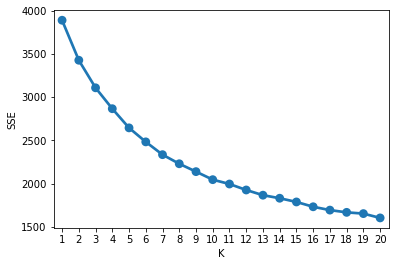

In [51]:
%matplotlib inline
sse={}
for k in range(1,21):
    kmeans=KMeans(n_clusters=k,random_state=700)
    kmeans.fit(data_normalized)
    sse[k]=kmeans.inertia_
plt.xlabel('K')    
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()));
sse

# F. How many clusters will you use for your k-means model?

In [52]:
from sklearn.cluster import KMeans
model2=KMeans(n_clusters = 5,random_state=700)
model2.fit(data_normalized)
labels=model2.predict(data_normalized)
Loyal3=Loyal.assign(Cluster=labels)
grouped=Loyal3.groupby(['Cluster'])
grouped.agg({
    'visits_2021':'mean',
    'avg_rides_dry':'mean',
    'avg_rides_water':'mean',
    'total_merch':'mean',
    'total_snack_shack':'mean',
    'total_goldzone':'mean',
    
}).round(1)

,visits_2021,avg_rides_dry,avg_rides_water,total_merch,total_snack_shack,total_goldzone
Cluster,,,,,,
0,10.7,6.7,3.6,275.5,132.5,344.4
1,11.0,6.2,4.1,222.6,92.3,255.3
2,16.3,9.2,3.4,253.8,108.6,314.3
3,9.9,10.9,4.8,236.5,117.3,290.0
4,11.9,8.3,4.1,274.2,110.5,139.8


In [53]:
from sklearn.cluster import KMeans
model3=KMeans(n_clusters = 6,random_state=700)
model3.fit(data_normalized)
labels=model3.predict(data_normalized)
Loyal4=Loyal.assign(Cluster=labels)
grouped=Loyal4.groupby(['Cluster'])
grouped.agg({
    'visits_2021':'mean',
    'avg_rides_dry':'mean',
    'avg_rides_water':'mean',
    'total_merch':'mean',
    'total_snack_shack':'mean',
    'total_goldzone':'mean',
    
}).round(1)

,visits_2021,avg_rides_dry,avg_rides_water,total_merch,total_snack_shack,total_goldzone
Cluster,,,,,,
0,9.0,7.9,3.1,272.2,115.4,374.3
1,11.2,6.0,4.3,216.8,97.6,269.6
2,11.1,9.3,2.7,239.9,116.2,153.8
3,11.0,10.8,5.3,238.1,122.4,309.4
4,16.3,8.1,3.5,264.7,119.6,312.9
5,11.6,7.8,5.2,282.1,101.6,176.8


In [54]:
from sklearn.cluster import KMeans
model4=KMeans(n_clusters = 7,random_state=700)
model4.fit(data_normalized)
labels=model4.predict(data_normalized)
Loyal5=Loyal.assign(Cluster=labels)
grouped=Loyal5.groupby(['Cluster'])
grouped.agg({
    'visits_2021':'mean',
    'avg_rides_dry':'mean',
    'avg_rides_water':'mean',
    'total_merch':'mean',
    'total_snack_shack':'mean',
    'total_goldzone':'mean',
    
}).round(1)

,visits_2021,avg_rides_dry,avg_rides_water,total_merch,total_snack_shack,total_goldzone
Cluster,,,,,,
0,10.8,6.7,3.3,281.4,136.5,353.4
1,10.6,10.8,4.6,221.6,129.2,260.4
2,10.2,8.7,4.5,246.9,76.9,342.0
3,11.3,8.1,5.4,283.3,107.9,177.6
4,12.1,5.3,4.3,219.1,109.8,265.4
5,11.2,8.7,2.4,250.4,108.5,151.8
6,16.7,9.5,3.2,260.3,110.3,313.0


F.I'll use 6 cluster in my k-mean clustering

# G. Build a k-means model with your desired number of clusters.

In [68]:
from sklearn.cluster import KMeans
model3=KMeans(n_clusters = 6,random_state=700)
model3.fit(data_normalized)
labels=model3.predict(data_normalized)
Loyal4=Loyal.assign(Cluster=labels)
Loyal4.groupby(['Cluster']).agg({
    'visits_2021':'mean',
    'avg_rides_dry':'mean',
    'avg_rides_water':'mean',
    'total_merch':'mean',
    'total_snack_shack':'mean',
    'total_goldzone':'mean',
    
}).round(2)

,visits_2021,avg_rides_dry,avg_rides_water,total_merch,total_snack_shack,total_goldzone
Cluster,,,,,,
0,9.01,7.85,3.12,272.22,115.42,374.34
1,11.22,5.95,4.35,216.84,97.55,269.62
2,11.08,9.34,2.70,239.87,116.16,153.82
3,10.99,10.82,5.33,238.11,122.37,309.43
4,16.29,8.05,3.51,264.69,119.64,312.93
5,11.60,7.77,5.20,282.09,101.59,176.78


# H. Generate and show summary statistics about each of your clusters.

In [61]:
print(Loyal4.describe().round(2))

       visits_2021  avg_rides_dry  avg_rides_water  total_merch  \
count       649.00         649.00           649.00       649.00   
mean         11.80           8.15             4.02       251.35   
std           3.45           2.54             1.56        36.01   
min           3.00           0.80             0.10       129.50   
25%           9.00           6.50             3.00       225.50   
50%          12.00           8.20             4.00       252.70   
75%          14.00           9.80             5.10       277.00   
max          24.00          16.90             8.90       369.60   

       total_snack_shack  total_goldzone  Cluster  
count             649.00          649.00   649.00  
mean              111.46          265.55     2.47  
std                29.00          109.43     1.71  
min                13.40            0.50     0.00  
25%                93.90          186.20     1.00  
50%               112.10          263.10     2.00  
75%               129.20        

# I. Build any three simple visualizations to help management better understand your clusters 

In [62]:
Loyal4.head()

,visits_2021,avg_rides_dry,avg_rides_water,total_merch,total_snack_shack,total_goldzone,Cluster
0,3,8.7,1.7,287.5,159.0,312.1,0
1,10,6.7,5.9,166.4,114.8,209.9,1
2,9,9.5,3.9,221.3,102.3,98.1,2
3,7,6.6,7.9,248.1,136.3,128.6,5
4,13,6.5,3.6,252.4,120.8,420.2,0


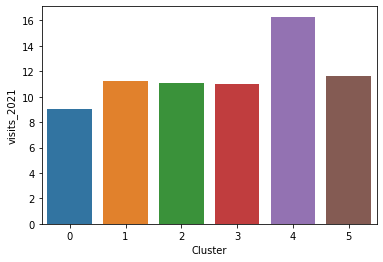

In [63]:
sns.barplot(x='Cluster',y='visits_2021',ci=None,data=Loyal4);

<AxesSubplot:xlabel='avg_rides_water', ylabel='count'>

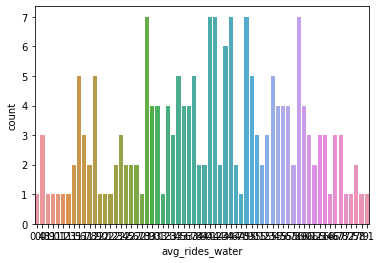

In [71]:
Goldzone_fans=Loyal4[(Loyal4.Cluster==0) | (Loyal4.Cluster==3)]
sns.countplot(x='avg_rides_water',data=Goldzone_fans)